<a href="https://colab.research.google.com/github/saumyam2/SynapseLearningPeriodTasks/blob/Week-2/SynapseWeekTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Synapse Week Two**

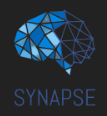

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding. Enough chitchat, lets get to work :P

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

OPTIONAL BUT USEFUL <br>
Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [ ]:
!pip install shap -q  #Will be used later on

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mount your Google Drive using the cell below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Regression

For regression, lets reuse the crab dataset that you worked on last week. Import the dataset from wherever you had saved it in the cell below.
Also print the first 5 rows to ensure you have loaded the dataset correctly.

In [ ]:
df_crab = pd.read_csv('/content/drive/MyDrive/Synapse Week 1/train.csv')
df_crab.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [ ]:
df_crab.shape

(74051, 10)

Now, let's some employ some Feature Engineering tactics which you would have performed in the previous tasks.

Create a function called crab_processing which takes a dataframe as an input, performs the following tasks, and returns a cleaned and edited df:

1) Drop the 'id' column.

2) Drop all rows where 'Height' of the crab is 0.

3) Create a new column called 'LostWeight' which is calculated using the following formula - ```
Weight - (Shucked + Viscera + Shell)``` .
If this formula gives a number less than 0, then assign 0 to the LostWeight column, else assign 1.

4) Finally, use one hot encoding to encode the column 'Sex'

Take help from your previous task where you have implemented these steps in different cells.


In [ ]:
# Your code starts here
def crab_processing(df):
  df.drop(['id'], axis=1, inplace = True)
  df.drop([index for index, row in df_crab.iterrows() if row['Height'] <= 0], axis = 0, inplace = True)

  LostWeight = []
  for index,row in df_crab.iterrows():
    if (row["Weight"] - (row["Shucked Weight"] + row["Viscera Weight"] + row["Shell Weight"]) > 0):
      LostWeight.append(1)
    else:
      LostWeight.append(0)

  df.insert(loc = 8, column = 'Lost Weight', value = LostWeight)

  df = pd.get_dummies(data = df, columns=["Sex"])
  return df

df_crab = crab_processing(df_crab)
df_crab.head()
# Your code ends here

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,9,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,8,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,9,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,11,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,8,0,1,0


In [ ]:
df_crab.iterrows

<bound method DataFrame.iterrows of       Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0       I  1.5250    1.1750  0.3750  28.973189       12.728926   
1       I  1.1000    0.8250  0.2750  10.418441        4.521745   
2       M  1.3875    1.1125  0.3750  24.777463       11.339800   
3       F  1.7000    1.4125  0.5000  50.660556       20.354941   
4       I  1.2500    1.0125  0.3375  23.289114       11.977664   
...    ..     ...       ...     ...        ...             ...   
74046   F  1.6625    1.2625  0.4375  50.660556       20.680960   
74047   I  1.0750    0.8625  0.2750  10.446791        4.323299   
74048   F  1.4875    1.2000  0.4125  29.483480       12.303683   
74049   I  1.2125    0.9625  0.3125  16.768729        8.972617   
74050   I  0.9125    0.6750  0.2000   5.386405        2.055339   

       Viscera Weight  Shell Weight  Age  
0            6.647958      8.348928    9  
1            2.324659      3.401940    8  
2            5.556502      6.662133    9  

If all is correct, this should be the shape of your df now.

In [ ]:
df_crab.shape

(74027, 12)

###Basic Visualization

In this problem, our aim is to predict the age of the crab, hence 'Age' here is called our target variable. To check its distribution, plot a histogram of the 'Age' column.

Choose the number of bins by experimenting. The output is expected to mimic a bell curve.

What is a histogram? - https://www.w3schools.com/python/matplotlib_histograms.asp

Difference between histogram and a bar graph - https://keydifferences.com/difference-between-histogram-and-bar-graph.html

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

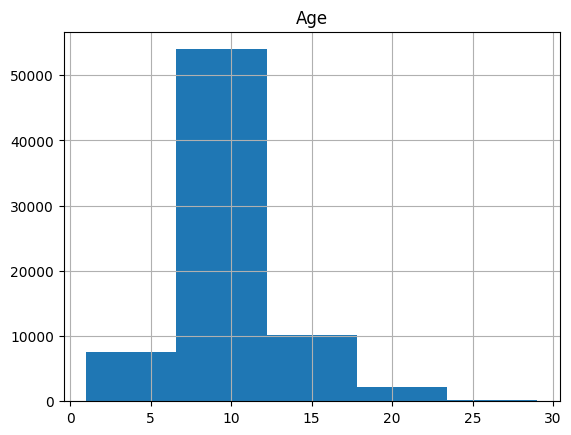

In [ ]:
# Your code starts here
df_crab.hist(column = 'Age', bins = 5)
# Your code ends here

###Feature and Variable Sets

As mentioned above, the 'Age' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'Age') and one which only contains the column 'Age'. Name them X and y respectively.

In [ ]:
X = df_crab.loc[:, df_crab.columns.drop('Age')]
y = df_crab['Age']

In [ ]:
# This code should print (74027, 11) and (74027, 1) if everything is correct
print(X.shape,y.shape)

(74027, 11) (74027,)


In [ ]:
X.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,0,1,0


In [ ]:
y.head()

0     9
1     8
2     9
3    11
4     8
Name: Age, dtype: int64

###Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [ ]:
# Import train_test_split Hint: Use sklearn.model_selection
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [108]:
# Your code starts here
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.3, random_state = 42)
# Your code ends here

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [ ]:
# Your code starts here
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Your code ends here

(51818, 11) (22209, 11) (51818,) (22209,)


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

###Model fit and training

Here is the complete lowdown on SVM (Support Vector Machine):<br>
Theory : https://youtu.be/H9yACitf-KM <br>
Theory: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ <br>
Implementation : https://youtu.be/FB5EdxAGxQg

Import SVR (Support Vector Regressor) and its metrics from scikit-learn.

> Indented block



In [123]:
# Add your import statement here
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error, median_absolute_error
# Create an SVR object 'svr' by calling SVR()
svr = SVR()

Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable.

Hint: svr.fit()

This might take about a minute or so, just to inform you.

In [124]:
# Your code starts here
svr.fit(X_train, y_train)
# Your code ends here

SVR()

###Prediction, error estimate, and regression evaluation matrices

**Prediction using the svr model**

The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

Use svr.predict() on X_test and store it in a variable called "predictions". Print type and size of the predictions.

Size should be (22009,) if everything is correct.

In [125]:
# Your code starts here
predictions = svr.predict(X_test)
print(type(predictions), len(predictions))
# Your code ends here

<class 'numpy.ndarray'> 300


Now that we have our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data falls on a 45 degree straight line

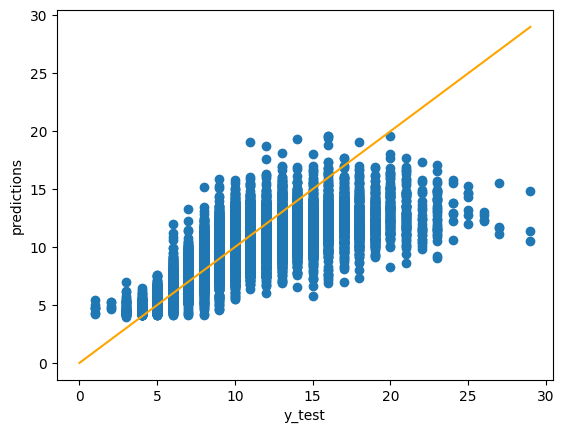

In [ ]:
# Your code starts here
maxVal = max(max(y_test), max(predictions))
plt.scatter(y_test, predictions, marker='o', label='Actual vs. Predicted')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.plot([0, maxVal], [0, maxVal], color = 'orange')
# Your code ends here

As you can see, it's not perfect, but you can definitely visualize the data lining up at a 45 degree angle.

**Model Evaluation**

We will be exploring the most common regression metric here namely R2 score. You can check out more metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Here's a video detailing all the popular regression metrics - https://www.youtube.com/watch?v=Ti7c-Hz7GSM

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [126]:
# Your code starts here
r2_sq = r2_score(y_test, predictions)
round(r2_sq, 3)
# Your code ends here

0.796

In the cell below, explain what the above score means and also elaborate how 'good' is the score in terms of evaluation of the model

The above score means that the model( y test value) is able to explain 55% of variance in the predictions(prediction of the x test value).
The score is a moderate one. It is able to explain some of the predictions, but it can still do better.

R^2 score is also called Coefficient of Determination. It's used to evaluate the performance of a linear regression model. It basically tells us the amount of variation, which is the difference in the sample of dataset and the predictions made by the model.
The formula for r square calculation is- R2= 1- SSr / SSmean.

SSr is the sum of square error in the regression line.
SSmean is the sum of square in the mean line.

The values that can be obtaied are-
1- **best possible score**, when SSr=0, regression line makes no error
0- when regression line is the same as the mean line, both make similar amounts of errors
negative values- when SSr > SSm, when regression line makes more error than mean line.
Red line is the mean line and blue line is the regression line.
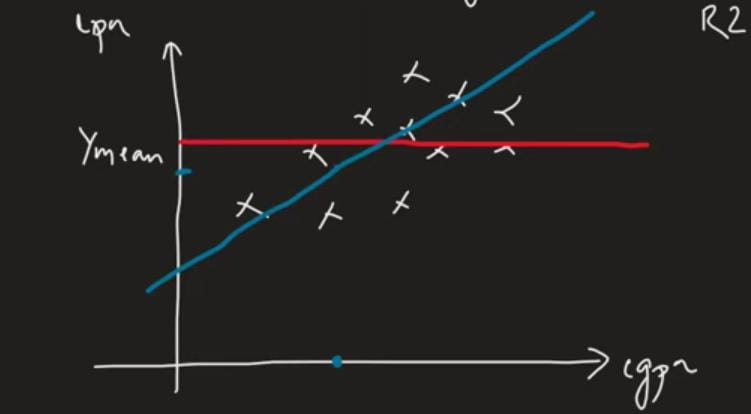



In [112]:
#Explore additional metrics here
mean_absolute_error(y_test, predictions)

0.15067561742268681

In [113]:
mean_squared_error(y_test, predictions)

0.05097370732621096

In [118]:
max_error(y_test, predictions) #max possible error

0.8853135854675

In [120]:
median_absolute_error(y_test, predictions)

0.09735944900636548

You have succesfully implemented Support Vector Regressor to predict Age of a crab. But is this the only regression model out there? In the cell below, list down 3 more regression models with a basic explanation of how they work. Also include a line explaining in which scenario each model works best.

*   **Decision Tree Regression-** At each node it makes a decision in such a way so as to minimise any errors. In the end, we get a tree like structure where each node can be mapped to make the best prediction.The leaf nodes represent the predicted values.
*   **Random Forest Regression-** has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.
*   **Linear regression-** It's used for predictive analysis. It models a relation bewtween the target and features by assuming a linear relationship. It finds the best fit straight line which minimizes the sum of squared differences between the observed and predicted values.







###OPTIONAL: Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [121]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


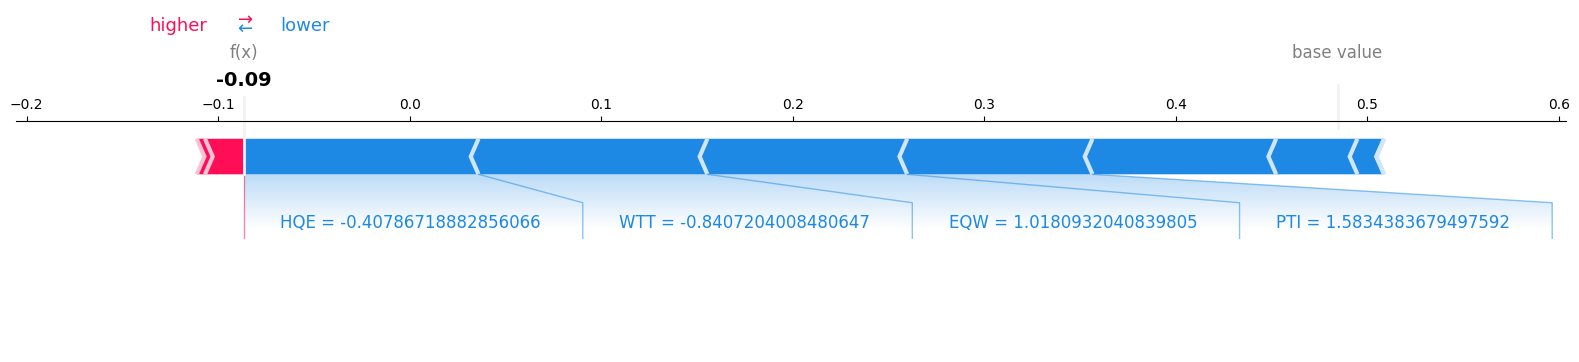

In [127]:
#Run this code as it is
ex = KernelExplainer(svr.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

##Classification

In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [ ]:
df = pd.read_csv('/content/classified_data.txt', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

###Basic EDA

In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [ ]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
#describe()
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

Here is some information about boxplots:

Understanding Boxplots:
https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 <br>
Comparing two boxplots: https://www.nagwa.com/en/explainers/812192146073/

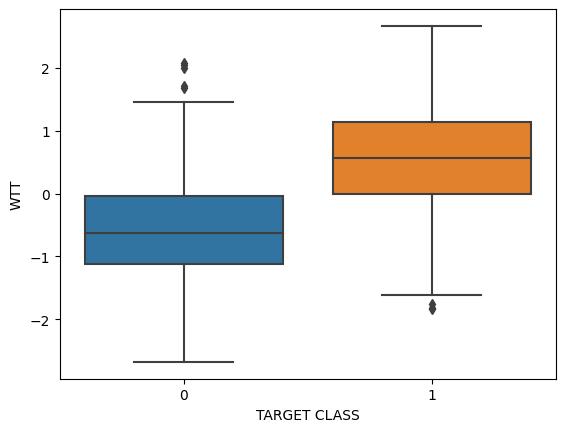

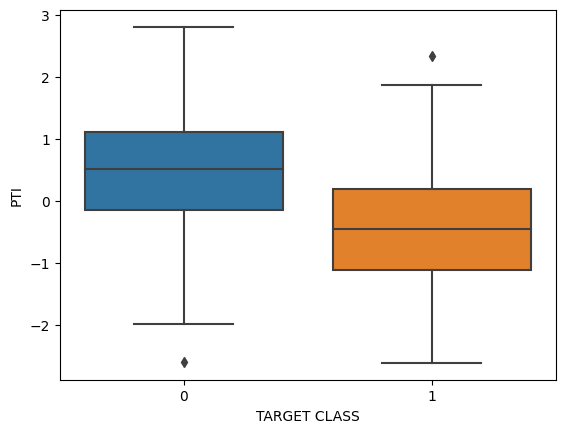

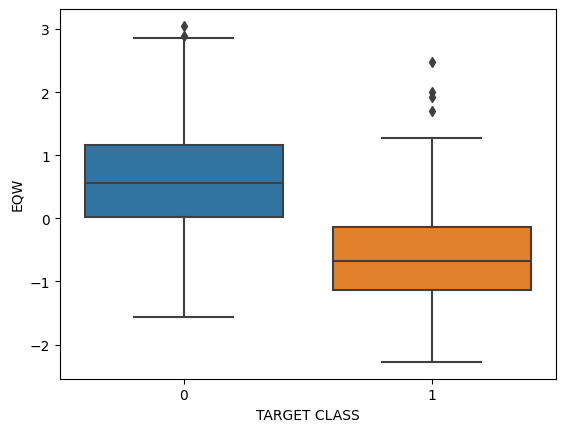

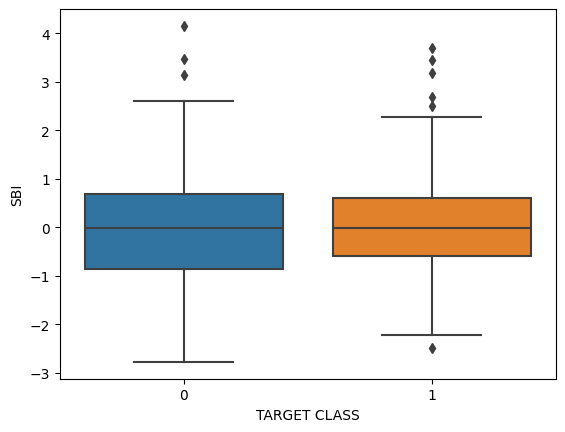

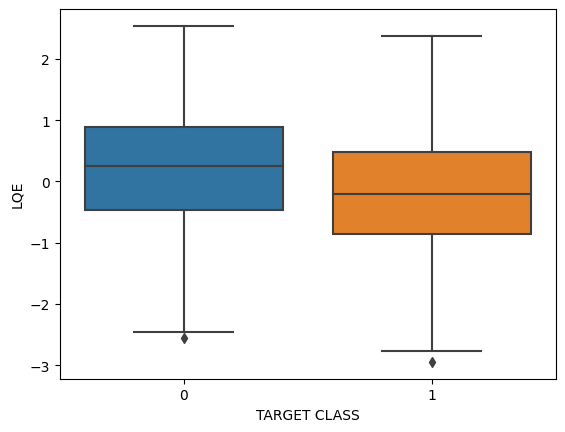

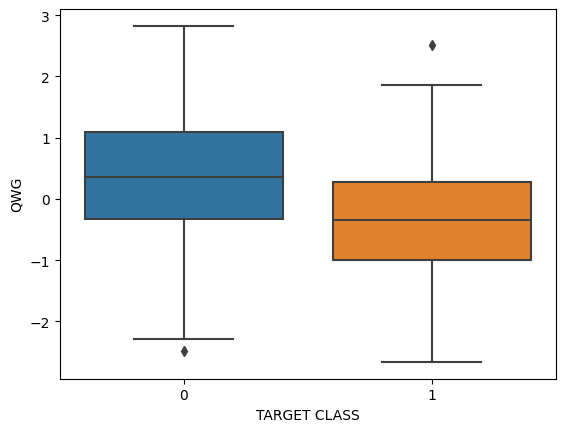

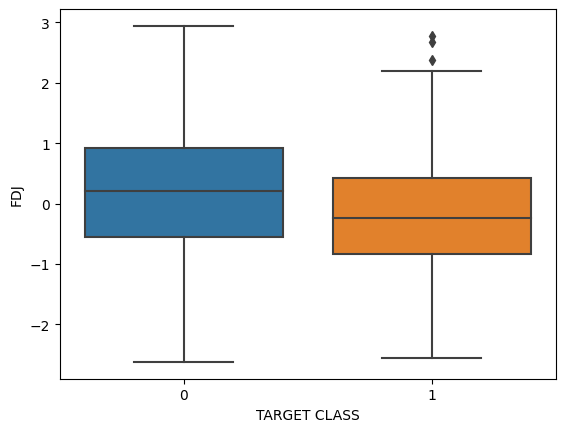

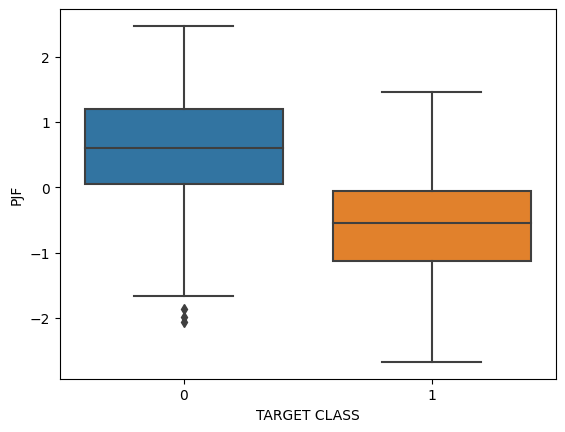

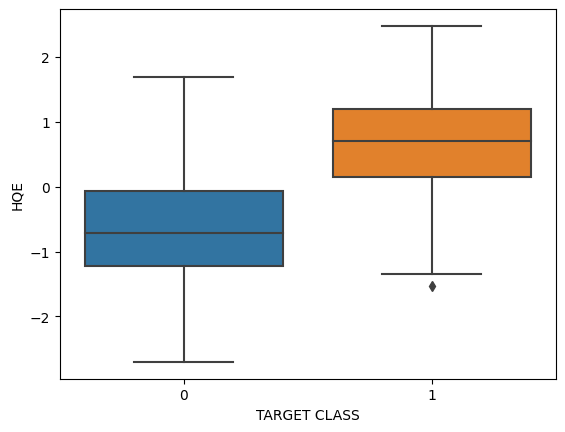

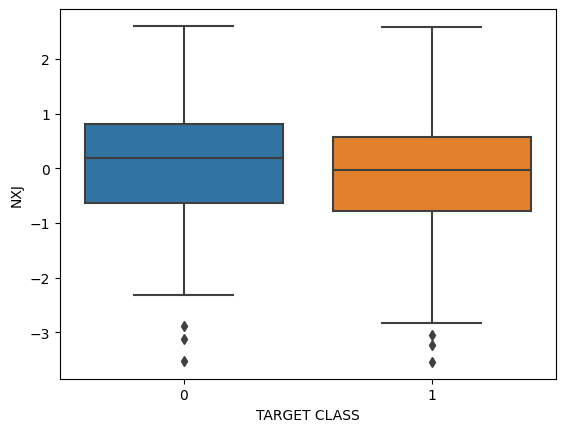

<Figure size 640x480 with 0 Axes>

In [49]:
# your code starts here
col = [item for item in df.columns if item!= 'TARGET CLASS']
for i in col:
  sns.boxplot(data=df, x='TARGET CLASS', y=i)
  plt.xlabel('TARGET CLASS')
  plt.ylabel(f'{i}')
  plt.figure()
# your code ends here

What conclusion, if any can you draw from these boxplots?
List them down below.

* The target class 0 has a higher median for 8/10 of the boxplots
* Majority of the median for target class 0 falls in the range 0 to 1 whereas for target class 1 it has range 0 to -1.
* The shape of the box appears to be symmetric for both 0,1 target classes. There isn't much visible skewness.
* Interquartile range falls between -1 to 1 for target class 0 and 1. But in the HQE column target 1 goes above 1.







### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [45]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = [item for item in df.columns if item!= 'TARGET CLASS']
scaled = ()
s = scaler.fit(df[[i]])
scaled = scaler.transform(df[[i]])
# your code ends here

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [59]:
# your code starts here
col = [item for item in df.columns if item!= 'TARGET CLASS']
scaled = ()
scaler.fit(df[col])
scaled = scaler.transform(df[col])
# scaled
# your code ends here

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [60]:
# your code starts here
df_feat = pd.DataFrame(scaled, columns=col)
df_feat.head()
# your code ends here

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [61]:
# Your code starts here.
X = df_feat
y = df['TARGET CLASS']
# Your code ends here

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [62]:
# Your code starts here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.3, random_state = 42)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [66]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# Your code ends here

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [67]:
# Your code starts here.
pred = knn.predict(X_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [95]:
# Your code starts here.
from sklearn.metrics import classification_report
classification_report(y_test, pred)
# Your code ends here

'              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95       142\n           1       0.96      0.94      0.95       158\n\n    accuracy                           0.95       300\n   macro avg       0.95      0.95      0.95       300\nweighted avg       0.95      0.95      0.95       300\n'

Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [93]:
# Your code starts here.
from sklearn.metrics import accuracy_score
accuracy = round((accuracy_score(y_test, pred)), 3)
print(accuracy)
# Your code ends here

0.95


Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [89]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
acc_list = []
# Your code starts here.
for i in range(1, 61):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  accuracy = round((accuracy_score(y_test, pred)), 3)
  acc_list.append(accuracy)
print(acc_list)

max = acc_list[0]
n_val = 0
k_val = []
for i in range(len(acc_list)):
  k_val.append(i+1)
  if (max < acc_list[i]):
    max = acc_list[i]
    n_val = i+1
print(max, n_val, k_val)
# Your code ends here

[0.937, 0.917, 0.943, 0.943, 0.943, 0.943, 0.937, 0.943, 0.943, 0.95, 0.95, 0.953, 0.953, 0.953, 0.953, 0.953, 0.953, 0.95, 0.947, 0.947, 0.95, 0.943, 0.943, 0.947, 0.94, 0.943, 0.947, 0.947, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]
0.953 12 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


**Plot a graph of K value vs Accuracy**

Text(0, 0.5, 'Accuracy')

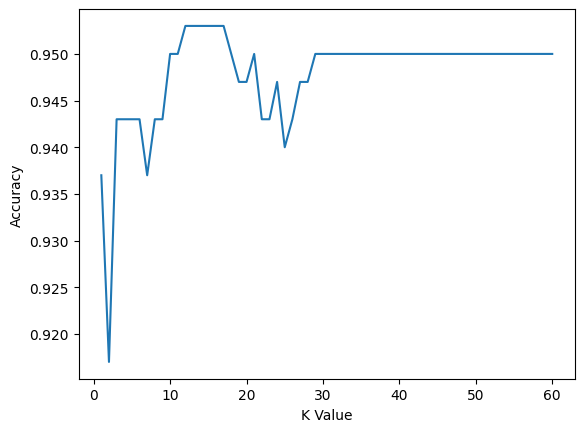

In [91]:
# Your code starts here.
plt.plot(k_val, acc_list)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
# Your code ends here

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [105]:
# Your code starts here.
n_val += 1
n_acc_best = max #0.953
n_neigh_best = n_val #13
print("Best value of n_neighbours:",n_neigh_best)
print("Corresponding highest accuracy:",n_acc_best)
# Your code ends here

Best value of n_neighbours: 13
Corresponding highest accuracy: 0.953


<Axes: >

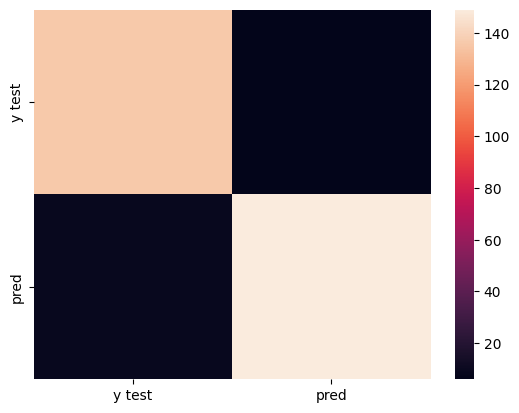

In [104]:
# Reasons:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, xticklabels=['y test','pred'],
            yticklabels=['y test','pred'])
'''
12 gives us the best value of n. In this case when we did the accuracy score check, it told us that the maximum accuracy we can achieve for our model is 0.953.
The best value of n should be chosen in such a way that it prevents overfitting or overfitting.
The value of n should always be an odd number, to ensure that there's no ties. That's why even though 12 and 13 give the same accuracy we have chosen 13.
When making predictions, it calculates the distance between the input data point and all the training examples, using a chosen distance metric such as
Euclidean distance.
'''

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Reinforcement Learning**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

**Reinforcement Learning-**

Reinforcement learning is a machine learning training method based on rewarding desired behaviors and punishing undesired ones.The model being trained is able to learn through trial and error.
This method assigns positive values to the desired actions to encourage the agent to use them, while negative values are assigned to undesired behaviors to discourage them.

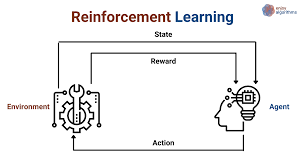

Reinforcement learning is all about making decisions sequentially. In simple words, we can say that the output depends on the state of the current input and the next input depends on the output of the previous input.

**Types of Reinforcement: **

1) Positive:

-Maximizes Performance

-Sustain Change for a long period of time

-Too much Reinforcement can lead to an overload of states which can diminish the results

2) Negative:

-Increases Behavior

-Provide defiance to a minimum standard of performance

-It Only provides enough to meet up the minimum behavior




**Elements of Reinforcement Learning-**

-Policy: Policy defines the learning agent behavior for given time period. It is a mapping from perceived states of the environment to actions to be taken when in those states.

-Reward function: Reward function is used to define a goal in a reinforcement learning problem.A reward function is a function that provides a numerical score based on the state of the environment

-Value function: Value functions specify what is good in the long run. The value of a state is the total amount of reward an agent can expect to accumulate over the future, starting from that state.

-Model of the environment: Models are used for planning.

**Application of Reinforcement Learnings: **

1. Robotics: Robots with pre-programmed behavior are useful in structured environments, such as the assembly line of an automobile manufacturing plant, where the task is repetitive in nature.

2. A master chess player makes a move. The choice is informed both by planning, anticipating possible replies and counter replies.

3. An adaptive controller adjusts parameters of a petroleum refinery’s operation in real time.


# **End of Task**

> ©DJS Synapse 2023 - 2024

